# Creation By - Mrs.Vandana Anil Kadam

#Problem Statement-
Description of companies and their status which we used a Investments_VC dataset with information on 54,000 companies. The four original classification in the dataset were "operating," and "acquired","closed","zero"; in order to predict operating class according to the target attribute "status".

Problem Statement-This dataset is a classification problem consist wheather four classes how much covered start-ups till 2014.How much covered each class in start-ups companies belonging the provided dataset.

#Import important libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
from sklearn.preprocessing import scale, StandardScaler
from sklearn.multiclass import OneVsOneClassifier,OneVsRestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

#Reading dataset

In [ ]:
vc=pd.read_csv("/content/investments_VC.csv",encoding='latin-1')
vc.head(5)

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
vc.shape

(54294, 39)

#Basic_EDA

In [ ]:
#all columns we can see here
vc.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

In [ ]:
len(vc)

54294

In [ ]:
vc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4    market               45470 non-null  object 
 5    funding_total_usd    49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

#Numerical features of our dataset

In [ ]:
#Describing  numerical data
vc.describe(include=[np.number])

,funding_rounds,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
count,49438.000000,38482.000000,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,...,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04
mean,1.696205,2007.359129,2.173215e+05,7.501051e+06,6.163322e+03,1.302213e+05,2.336410e+04,1.888157e+06,6.541898e+04,1.628453e+05,...,3.845592e+04,7.074227e+03,1.243955e+06,1.492891e+06,1.205356e+06,7.375261e+05,3.424682e+05,1.697692e+05,5.767067e+04,1.423197e+04
std,1.294213,7.579203,1.056985e+06,2.847112e+07,1.999048e+05,2.981404e+06,1.432046e+06,1.382046e+08,6.582908e+05,5.612088e+06,...,3.864461e+06,4.282166e+05,5.531974e+06,7.472704e+06,7.993592e+06,9.815218e+06,5.406915e+06,6.277905e+06,5.252312e+06,2.716865e+06
min,1.000000,1902.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000,2010.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000,2012.000000,2.500000e+04,5.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,18.000000,2014.000000,1.300000e+08,2.351000e+09,2.500000e+07,2.924328e+08,3.000000e+08,3.007950e+10,6.359026e+07,7.505000e+08,...,6.806116e+08,7.200000e+07,3.190000e+08,5.420000e+08,4.900000e+08,1.200000e+09,4.000000e+08,1.060000e+09,1.000000e+09,6.000000e+08


# Categorical data

In [ ]:
#Describing non numerical data(categorical features)
vc.describe(exclude=[np.number])

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,founded_at,founded_month,founded_quarter,first_funding_at,last_funding_at
count,49438,49437,45989,45477,45470,49438,48124,44165,30161,44165,43322,38554,38482,38482,49438,49438
unique,49436,49350,45850,16675,753,14617,3,115,61,1089,4188,3369,420,218,3914,3657
top,/organization/treasure-valley-urology-services,Roost,http://spaceport.io,|Software|,Software,-,operating,USA,CA,SF Bay Area,San Francisco,2012-01-01,2012-01,2012-Q1,2012-01-01,2013-01-01
freq,2,4,2,3650,4620,8531,41829,28793,9917,6804,2615,2181,2327,2904,468,387


In [ ]:
vc.rename(columns={' funding_total_usd ': "funding_total_usd",
                    ' market ': "market"},inplace=True)

In [ ]:
#information about each and every atrributes in stastical format(integer values in  format_specification details)
vc.describe().T

,count,mean,std,min,25%,50%,75%,max
funding_rounds,49438.0,1.696205e+00,1.294213e+00,1.0,1.0,1.0,2.0,1.800000e+01
founded_year,38482.0,2.007359e+03,7.579203e+00,1902.0,2006.0,2010.0,2012.0,2.014000e+03
seed,49438.0,2.173215e+05,1.056985e+06,0.0,0.0,0.0,25000.0,1.300000e+08
venture,49438.0,7.501051e+06,2.847112e+07,0.0,0.0,0.0,5000000.0,2.351000e+09
equity_crowdfunding,49438.0,6.163322e+03,1.999048e+05,0.0,0.0,0.0,0.0,2.500000e+07
undisclosed,49438.0,1.302213e+05,2.981404e+06,0.0,0.0,0.0,0.0,2.924328e+08
convertible_note,49438.0,2.336410e+04,1.432046e+06,0.0,0.0,0.0,0.0,3.000000e+08
debt_financing,49438.0,1.888157e+06,1.382046e+08,0.0,0.0,0.0,0.0,3.007950e+10
angel,49438.0,6.541898e+04,6.582908e+05,0.0,0.0,0.0,0.0,6.359026e+07
grant,49438.0,1.628453e+05,5.612088e+06,0.0,0.0,0.0,0.0,7.505000e+08


#Missing values

In [ ]:
#let's see how many nulls/missing values in our dataset percentages of each column
vc.isnull().mean()*100

permalink                8.943898
name                     8.945740
homepage_url            15.296350
category_list           16.239363
market                  16.252256
funding_total_usd        8.943898
status                  11.364055
country_code            18.655837
state_code              44.448742
region                  18.655837
city                    20.208494
funding_rounds           8.943898
founded_at              28.990312
founded_month           29.122923
founded_quarter         29.122923
founded_year            29.122923
first_funding_at         8.943898
last_funding_at          8.943898
seed                     8.943898
venture                  8.943898
equity_crowdfunding      8.943898
undisclosed              8.943898
convertible_note         8.943898
debt_financing           8.943898
angel                    8.943898
grant                    8.943898
private_equity           8.943898
post_ipo_equity          8.943898
post_ipo_debt            8.943898
secondary_mark

In [ ]:
vc.isnull()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54289,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
54290,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
54291,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
54292,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [ ]:
vc.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#check sum of all null values
vc.isnull().sum()

permalink                4856
name                     4857
homepage_url             8305
category_list            8817
market                   8824
funding_total_usd        4856
status                   6170
country_code            10129
state_code              24133
region                  10129
city                    10972
funding_rounds           4856
founded_at              15740
founded_month           15812
founded_quarter         15812
founded_year            15812
first_funding_at         4856
last_funding_at          4856
seed                     4856
venture                  4856
equity_crowdfunding      4856
undisclosed              4856
convertible_note         4856
debt_financing           4856
angel                    4856
grant                    4856
private_equity           4856
post_ipo_equity          4856
post_ipo_debt            4856
secondary_market         4856
product_crowdfunding     4856
round_A                  4856
round_B                  4856
round_C   

#Missing values showing through visuailization

<Axes: >

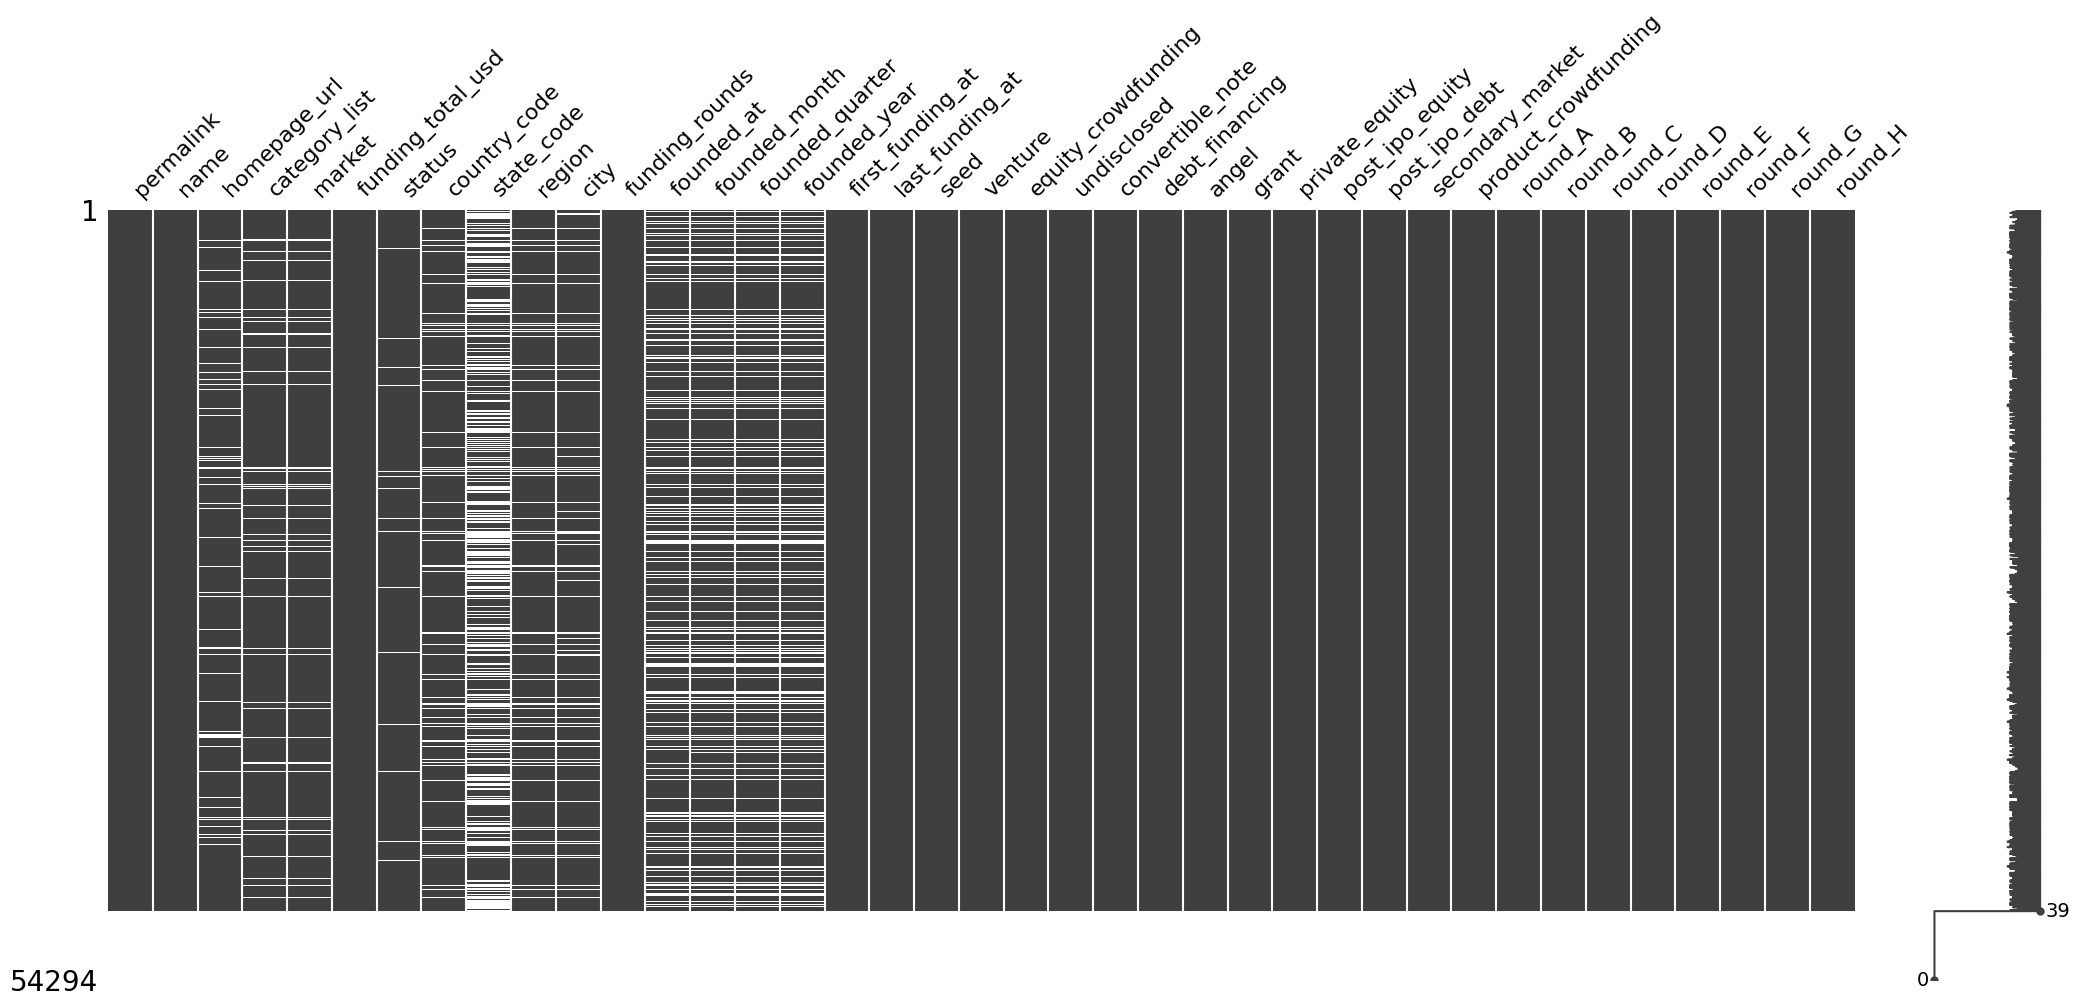

In [ ]:
#visualization of missing values using missingno
msno.matrix(vc)

<Axes: >

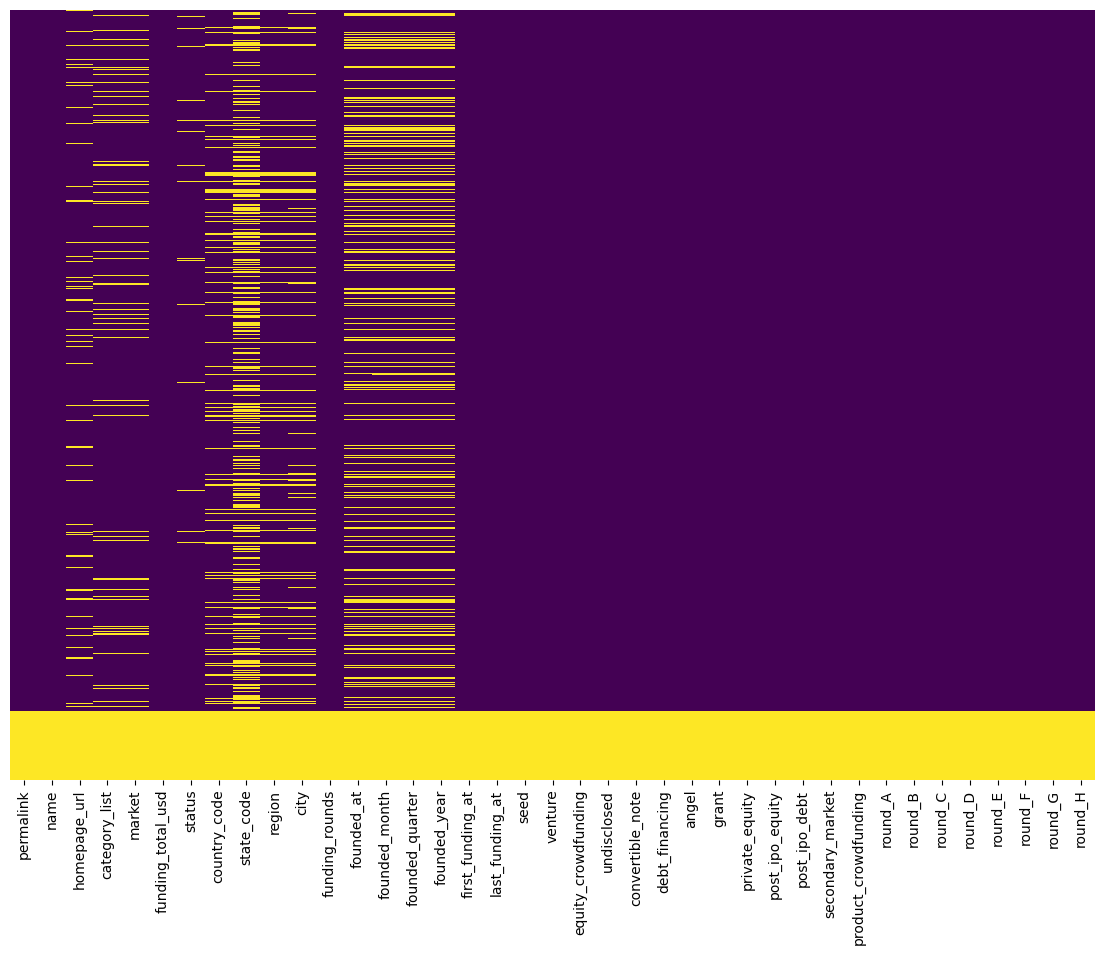

In [ ]:
#visualization of missing values using seaborn library
plt.figure(figsize=(14,10))
sns.heatmap(vc.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [ ]:
vc.tail()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
54289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#corelation metrics

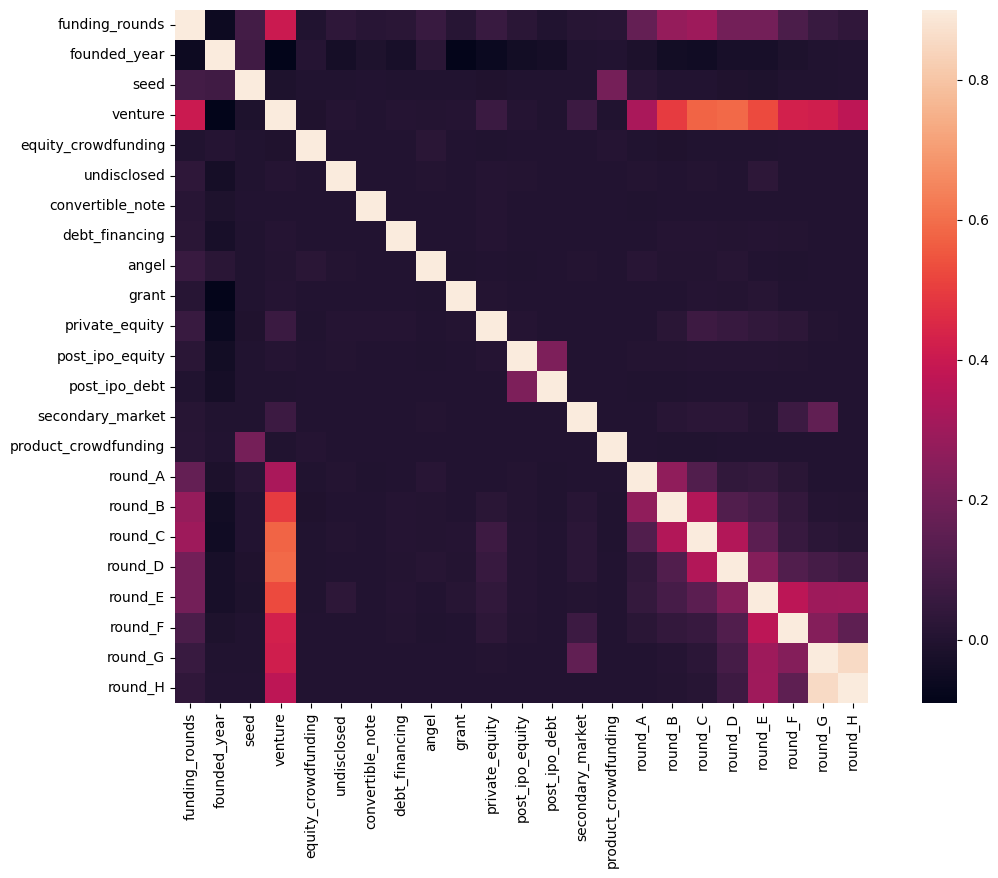

                      funding_rounds  founded_year      seed   venture  \
funding_rounds              1.000000     -0.058314  0.085700  0.402429   
founded_year               -0.058314      1.000000  0.077382 -0.090478   
seed                        0.085700      0.077382  1.000000 -0.011537   
venture                     0.402429     -0.090478 -0.011537  1.000000   
equity_crowdfunding        -0.002214      0.006309 -0.003869 -0.007326   
undisclosed                 0.032151     -0.036079 -0.004652  0.008732   
convertible_note            0.016727     -0.009242 -0.001362  0.000782   
debt_financing              0.020536     -0.025287 -0.002338  0.008727   
angel                       0.058852      0.017887 -0.002690  0.005444   
grant                       0.013307     -0.085198 -0.005056  0.007888   
private_equity              0.057745     -0.061694 -0.008911  0.063486   
post_ipo_equity             0.019070     -0.042166 -0.004486  0.008942   
post_ipo_debt              -0.001632  

In [ ]:
#corelation metrics
corelation_metrics=vc.corr()
fig=plt.figure(figsize=(14,9))
sns.heatmap(corelation_metrics,vmax=.9,square=True)#annot=value
plt.show()
print(corelation_metrics)

In [ ]:
#which data types in our dataset's attributes.
vc.dtypes

permalink                object
name                     object
homepage_url             object
category_list            object
market                   object
funding_total_usd        object
status                   object
country_code             object
state_code               object
region                   object
city                     object
funding_rounds          float64
founded_at               object
founded_month            object
founded_quarter          object
founded_year            float64
first_funding_at         object
last_funding_at          object
seed                    float64
venture                 float64
equity_crowdfunding     float64
undisclosed             float64
convertible_note        float64
debt_financing          float64
angel                   float64
grant                   float64
private_equity          float64
post_ipo_equity         float64
post_ipo_debt           float64
secondary_market        float64
product_crowdfunding    float64
round_A 

#Visualization of features

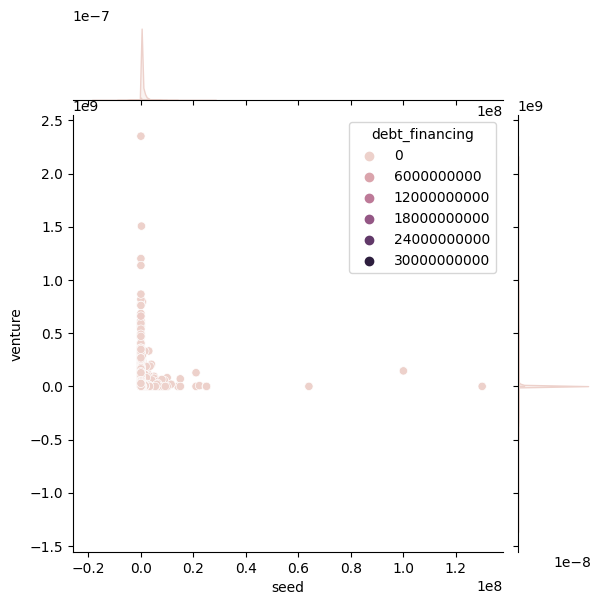

In [ ]:
sns.jointplot(x="seed",y="venture",hue="debt_financing",data=vc)
plt.show()

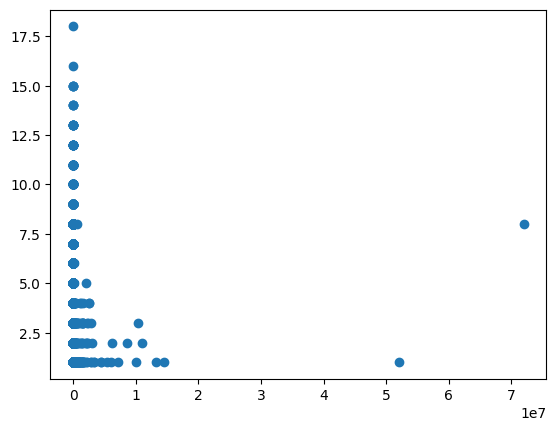

In [ ]:
plt.scatter(x="product_crowdfunding",y="funding_rounds",data=vc)
plt.show()

#Target variable-"Status"

In [ ]:
len(vc["status"].unique())

4

In [ ]:
vc["status"].value_counts()

operating    41829
acquired      3692
closed        2603
Name: status, dtype: int64

In [ ]:
vc.groupby("status").mean().T

status,acquired,closed,operating
funding_rounds,2.013814e+00,1.434114e+00,1.689522e+00
founded_year,2.003798e+03,2.007276e+03,2.007723e+03
seed,1.783670e+05,1.415031e+05,2.275289e+05
venture,1.385521e+07,5.212253e+06,7.194281e+06
equity_crowdfunding,2.406028e+03,0.000000e+00,6.984983e+03
undisclosed,1.559854e+05,3.732560e+04,1.304164e+05
convertible_note,6.423306e+03,1.012430e+04,2.587812e+04
debt_financing,1.905123e+06,6.263045e+05,1.989447e+06
angel,6.677897e+04,7.328595e+04,6.554313e+04
grant,2.570494e+04,5.857066e+04,1.811988e+05


operating    41829
acquired      3692
closed        2603
Name: status, dtype: int64


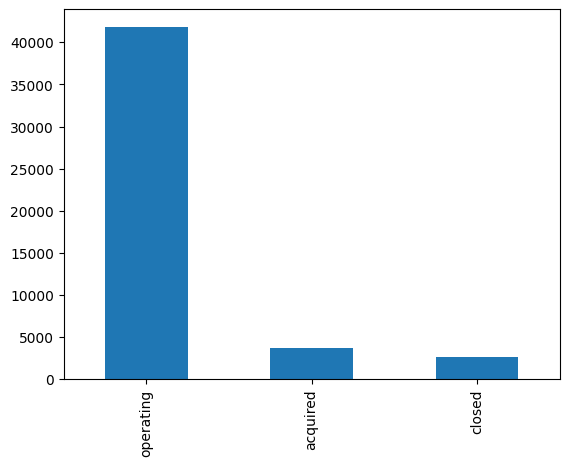

In [ ]:
#"status" Target feature's value_counting
#1= Acquired
#2=closed
#3=Operating
print(vc["status"].value_counts())
vc["status"].value_counts().plot(kind="bar")
plt.show()

In [ ]:
#showing corelation of features to each other
vc.corr()

,funding_rounds,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
funding_rounds,1.000000,-0.058314,0.085700,0.402429,-0.002214,0.032151,0.016727,0.020536,0.058852,0.013307,...,0.013368,0.015490,0.165754,0.278808,0.298558,0.200275,0.203276,0.104723,0.059684,0.035165
founded_year,-0.058314,1.000000,0.077382,-0.090478,0.006309,-0.036079,-0.009242,-0.025287,0.017887,-0.085198,...,-0.005177,-0.001129,-0.016942,-0.041086,-0.045556,-0.028507,-0.027663,-0.009441,-0.003165,-0.000656
seed,0.085700,0.077382,1.000000,-0.011537,-0.003869,-0.004652,-0.001362,-0.002338,-0.002690,-0.005056,...,-0.001951,0.203606,0.014267,0.001646,-0.000901,-0.007789,-0.010665,-0.005288,-0.002043,-0.001077
venture,0.402429,-0.090478,-0.011537,1.000000,-0.007326,0.008732,0.000782,0.008727,0.005444,0.007888,...,0.064629,-0.003084,0.325406,0.495186,0.575145,0.588288,0.528459,0.427673,0.418681,0.373412
equity_crowdfunding,-0.002214,0.006309,-0.003869,-0.007326,1.000000,-0.001347,-0.000254,-0.000414,0.018886,-0.000891,...,-0.000307,0.008572,-0.003763,-0.005898,-0.004649,-0.002317,-0.001953,-0.000834,-0.000339,-0.000162
undisclosed,0.032151,-0.036079,-0.004652,0.008732,-0.001347,1.000000,-0.000680,-0.000342,0.004023,-0.001134,...,-0.000435,-0.000709,0.004391,-0.001122,0.003885,0.000709,0.027595,-0.000804,-0.000387,-0.000229
convertible_note,0.016727,-0.009242,-0.001362,0.000782,-0.000254,-0.000680,1.000000,0.000981,-0.000712,-0.000383,...,-0.000162,-0.000207,-0.001881,0.000216,0.001534,0.000490,0.000036,-0.000353,-0.000088,-0.000085
debt_financing,0.020536,-0.025287,-0.002338,0.008727,-0.000414,-0.000342,0.000981,1.000000,-0.001129,-0.000304,...,-0.000101,-0.000225,-0.000362,0.007163,0.008477,0.003760,0.006828,0.005470,0.000146,-0.000006
angel,0.058852,0.017887,-0.002690,0.005444,0.018886,0.004023,-0.000712,-0.001129,1.000000,-0.002580,...,0.003598,-0.001295,0.017266,0.003194,0.004875,0.013798,-0.000738,-0.001883,-0.000272,0.000429
grant,0.013307,-0.085198,-0.005056,0.007888,-0.000891,-0.001134,-0.000383,-0.000304,-0.002580,1.000000,...,-0.000289,0.000733,0.000387,0.002147,0.008703,0.004128,0.011054,-0.000448,-0.000319,-0.000152


#country_code analysis

In [ ]:
len(vc["country_code"].unique())

116

In [ ]:
vc.groupby("country_code").mean().T

country_code,ALB,ARE,ARG,ARM,AUS,AUT,AZE,BEL,BGD,BGR,...,TWN,TZA,UGA,UKR,URY,USA,UZB,VNM,ZAF,ZWE
funding_rounds,1.0,1.227273e+00,1.604027e+00,2.5,1.484076e+00,1.543689e+00,1.333333,1.483221e+00,2.285714e+00,1.735294,...,1.365854e+00,1.142857,1.200000,1.133333,1.333333,1.886014e+00,1.0,1.190476e+00,1.269231e+00,1.0
founded_year,2014.0,2.009889e+03,2.009896e+03,2008.5,2.008351e+03,2.008857e+03,2012.000000,2.006780e+03,2.009714e+03,2011.203704,...,2.006107e+03,2009.500000,2011.222222,2011.275000,2007.200000,2.006789e+03,2006.0,2.004467e+03,2.007182e+03,NaN
seed,0.0,2.949848e+05,1.102519e+05,147738.0,2.714642e+05,1.940011e+05,103333.333333,2.144027e+05,2.761190e+05,96956.852941,...,1.677330e+05,230571.428571,1700.000000,104355.555556,28333.333333,2.372179e+05,90000.0,2.619048e+04,3.360002e+04,0.0
venture,0.0,4.156742e+06,1.566842e+06,13258750.0,2.346203e+06,2.935360e+06,0.000000,4.776233e+06,6.286381e+06,613714.705882,...,1.423974e+07,1000000.000000,250000.000000,462000.000000,958333.333333,9.378348e+06,0.0,1.158119e+06,3.522827e+06,0.0
equity_crowdfunding,0.0,7.575758e+02,0.000000e+00,0.0,5.254777e+03,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2205.882353,...,0.000000e+00,0.000000,0.000000,0.000000,13333.333333,6.556259e+03,0.0,0.000000e+00,0.000000e+00,0.0
undisclosed,0.0,2.272727e+02,3.968049e+04,0.0,1.671975e+04,0.000000e+00,0.000000,5.127866e+03,0.000000e+00,1020.882353,...,1.001424e+05,0.000000,0.000000,0.000000,0.000000,5.000788e+04,0.0,0.000000e+00,1.250000e+06,0.0
convertible_note,0.0,7.575758e+03,4.362416e+03,0.0,1.117099e+03,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,5773.661765,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,3.701931e+04,0.0,0.000000e+00,0.000000e+00,0.0
debt_financing,0.0,0.000000e+00,2.486297e+04,0.0,1.800406e+05,8.806408e+03,0.000000,9.706523e+04,2.848970e+05,0.000000,...,0.000000e+00,0.000000,100500.000000,0.000000,0.000000,2.717185e+06,0.0,0.000000e+00,1.088462e+06,10000000.0
angel,0.0,5.736742e+04,3.947460e+04,0.0,1.815657e+05,1.209486e+05,0.000000,7.657018e+04,2.031371e+04,6102.941176,...,1.121676e+05,428571.428571,44000.000000,16222.222222,25000.000000,5.547645e+04,0.0,2.380952e+03,5.736154e+04,0.0
grant,0.0,1.480303e+05,1.879195e+03,0.0,4.180199e+05,4.667650e+04,20666.666667,1.245485e+05,3.571429e+03,0.000000,...,0.000000e+00,0.000000,0.000000,666.666667,0.000000,2.020749e+05,0.0,0.000000e+00,7.115385e+04,0.0


<Axes: ylabel='country_code'>

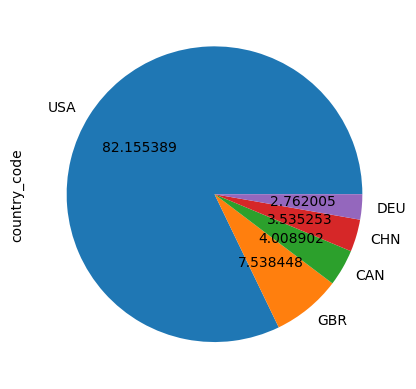

In [ ]:
vc["country_code"].value_counts()[:5].plot(kind="pie",autopct="%2f")

#Region Analysis


In [ ]:
vc.region

0        New York City
1          Los Angeles
2              Tallinn
3               London
4               Dallas
             ...      
54289              NaN
54290              NaN
54291              NaN
54292              NaN
54293              NaN
Name: region, Length: 54294, dtype: object

In [ ]:
len(vc["region"].unique())

1090

In [ ]:
vc.groupby("region").mean().T

region,A Coruna,AB - Other,AK - Other,AL - Other,AR - Other,ARG - Other,AUS - Other,AUT - Other,AZ - Other,AZE - Other,...,Zagreb,Zamudio,Zanzibar Urban,Zaragoza,Zhejiang,Zhengzhou,Zhuhai,Zurich,Çan,Évry
funding_rounds,1.0,1.000000e+00,1.25,1.062500e+00,1.150000,1.571429,1.166667e+00,1.235294e+00,1.25,2.0,...,1.333333,1.0,1.0,2.00,1.0,1.0,1.25,1.459459e+00,1.545455e+00,1.000000
founded_year,2012.5,2.011167e+03,2010.25,2.000417e+03,2008.315789,2009.000000,2.008095e+03,2.006462e+03,2007.50,2013.0,...,2008.000000,NaN,2004.0,2004.50,NaN,2012.0,1995.00,2.008633e+03,2.006600e+03,2006.500000
seed,17500.0,1.428571e+04,37500.00,5.825000e+04,31784.400000,129237.571429,4.729091e+05,1.727441e+05,37500.00,100000.0,...,60774.666667,0.0,0.0,35569.50,0.0,0.0,0.00,2.428736e+05,1.190868e+05,0.000000
venture,1151725.0,3.142857e+06,2175000.00,1.896875e+05,64087.800000,175714.285714,8.581266e+05,2.498457e+06,6525000.00,0.0,...,877889.666667,119000.0,0.0,250000.00,24515000.0,5737911.0,76045705.00,4.181771e+06,7.361915e+06,129000.000000
equity_crowdfunding,0.0,1.392857e+05,0.00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,1250.00,0.0,...,0.000000,0.0,0.0,0.00,0.0,0.0,0.00,0.000000e+00,0.000000e+00,0.000000
undisclosed,67705.0,0.000000e+00,0.00,0.000000e+00,0.000000,0.000000,6.666667e+03,0.000000e+00,0.00,0.0,...,0.000000,0.0,0.0,0.00,0.0,0.0,8160.00,0.000000e+00,0.000000e+00,0.000000
convertible_note,0.0,0.000000e+00,0.00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.00,0.0,...,0.000000,0.0,0.0,0.00,0.0,0.0,0.00,0.000000e+00,0.000000e+00,0.000000
debt_financing,0.0,0.000000e+00,0.00,6.668750e+05,0.000000,0.000000,0.000000e+00,0.000000e+00,12500.00,0.0,...,0.000000,0.0,0.0,161859.75,0.0,0.0,0.00,0.000000e+00,2.500000e+06,0.000000
angel,0.0,0.000000e+00,0.00,0.000000e+00,50000.000000,0.000000,6.666667e+03,2.352941e+04,0.00,0.0,...,0.000000,0.0,3000000.0,0.00,0.0,0.0,0.00,1.471015e+05,2.272727e+03,92251.333333
grant,0.0,0.000000e+00,0.00,0.000000e+00,0.000000,0.000000,3.333333e+03,0.000000e+00,0.00,62000.0,...,0.000000,0.0,0.0,0.00,0.0,0.0,0.00,3.652703e+04,0.000000e+00,0.000000


<Axes: ylabel='region'>

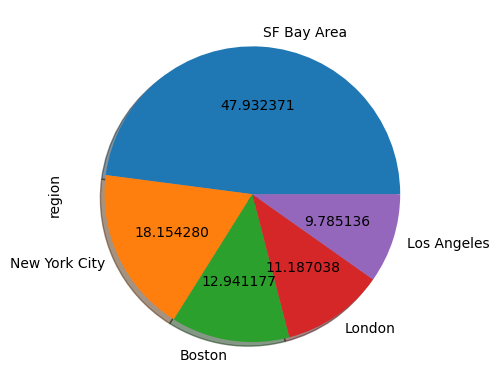

In [ ]:
vc["region"].value_counts()[:5].plot(kind="pie",autopct="%2f",shadow=True)

#City Analysis

In [ ]:
len(vc["city"].unique())

4189

In [ ]:
vc.city=="New York"

0         True
1        False
2        False
3        False
4        False
         ...  
54289    False
54290    False
54291    False
54292    False
54293    False
Name: city, Length: 54294, dtype: bool

<Axes: ylabel='city'>

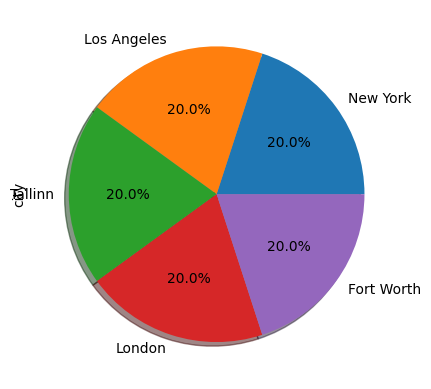

In [ ]:
vc.city[:5].value_counts().plot(kind="pie",autopct="%1.1f%%",shadow=True)

#funding _rounds analysis

In [ ]:
len(vc["funding_rounds"].unique())

18

In [ ]:
vc.funding_rounds.value_counts()

1.0     32039
2.0      9219
3.0      4026
4.0      1997
5.0      1001
6.0       560
7.0       252
8.0       152
9.0        84
10.0       43
11.0       35
12.0       12
13.0        8
15.0        4
14.0        4
16.0        1
18.0        1
Name: funding_rounds, dtype: int64

In [ ]:
vc.groupby("funding_rounds").mean().T

funding_rounds,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,18.0
founded_year,2.007495e+03,2.007625e+03,2.007330e+03,2.006512e+03,2.006139e+03,2.005635e+03,2.005026e+03,2.004479e+03,2.004115e+03,2.004302e+03,2.003212e+03,2.004833e+03,2.004286e+03,2.005333e+03,2002.75,2008.0,2005.0
seed,1.428628e+05,2.985149e+05,4.191700e+05,4.011495e+05,3.986665e+05,4.955488e+05,3.646934e+05,6.733738e+05,3.286710e+05,4.200704e+05,1.776391e+05,2.294167e+04,0.000000e+00,0.000000e+00,335000.00,1745363.0,0.0
venture,2.469194e+06,7.381630e+06,1.504348e+07,2.474722e+07,3.750255e+07,5.359266e+07,5.954205e+07,7.757150e+07,8.121636e+07,8.655789e+07,1.783546e+08,1.337499e+08,5.016350e+07,3.507339e+07,59888589.25,0.0,169793165.0
equity_crowdfunding,6.721191e+03,2.991360e+03,1.229048e+04,1.523522e+03,1.955978e+03,1.071934e+04,1.984127e+02,0.000000e+00,1.488095e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.0,0.0
undisclosed,8.458129e+04,1.573882e+05,1.566236e+05,3.486615e+05,2.655788e+05,3.093806e+05,9.133910e+05,6.123225e+05,4.889484e+05,1.574561e+06,1.428571e+04,5.295965e+06,0.000000e+00,0.000000e+00,3750000.00,0.0,0.0
convertible_note,1.437848e+04,1.736035e+04,4.280386e+04,5.884281e+04,6.513370e+04,9.677088e+04,1.555226e+05,1.455698e+05,5.712935e+05,4.688402e+04,1.285714e+05,4.067711e+05,5.937500e+04,9.875000e+05,0.00,0.0,0.0
debt_financing,8.981101e+05,1.022329e+06,1.876902e+06,2.020135e+06,3.264395e+07,5.407802e+06,4.846856e+06,1.175893e+07,2.397997e+07,2.990470e+07,3.047000e+07,5.887436e+06,4.136693e+07,6.050994e+06,1162755.25,2832362.0,43017719.0
angel,4.255944e+04,8.034028e+04,1.219874e+05,1.548878e+05,1.110298e+05,1.295568e+05,2.210974e+05,1.157839e+05,1.605075e+05,2.380000e+05,4.390000e+05,1.958333e+05,0.000000e+00,0.000000e+00,7763597.50,37749.0,0.0
grant,1.122905e+05,3.209749e+05,8.534315e+04,1.785163e+05,8.469529e+04,1.790659e+05,1.363984e+05,2.101684e+06,9.281845e+05,8.523256e+05,3.617143e+06,1.369917e+05,1.491958e+06,0.000000e+00,0.00,229846.0,0.0
private_equity,1.590981e+06,1.641511e+06,2.215369e+06,3.957419e+06,5.247051e+06,5.597608e+06,5.297388e+06,1.800894e+07,3.296761e+07,1.094848e+07,6.742401e+07,7.006460e+07,9.000500e+07,0.000000e+00,0.00,0.0,0.0


<Axes: ylabel='funding_rounds'>

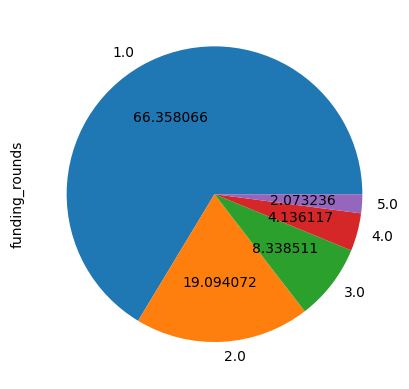

In [ ]:
vc["funding_rounds"].value_counts()[:5].plot(kind="pie",autopct="%2f")

#state_code analysis

In [ ]:
vc.state_code

0         NY
1         CA
2        NaN
3        NaN
4         TX
        ... 
54289    NaN
54290    NaN
54291    NaN
54292    NaN
54293    NaN
Name: state_code, Length: 54294, dtype: object

In [ ]:
len(vc["state_code"].unique())

62

In [ ]:
vc.groupby("state_code").mean().T

state_code,AB,AK,AL,AR,AZ,BC,CA,CO,CT,DC,...,SK,TN,TX,UT,VA,VT,WA,WI,WV,WY
funding_rounds,1.295652e+00,1.583333,1.352381e+00,1.169492,1.565749e+00,1.783019e+00,2.033478e+00,1.941909e+00,1.743671e+00,1.719780e+00,...,1.250000e+00,1.948905e+00,1.800819e+00,1.736986e+00,1.768535e+00,1.583333e+00,1.979466e+00,1.759162e+00,1.533333e+00,1.058824
founded_year,2.007880e+03,2006.909091,2.001356e+03,2007.215569,2.006614e+03,2.007326e+03,2.007371e+03,2.006654e+03,2.005598e+03,2.008778e+03,...,2.012333e+03,2.007089e+03,2.006207e+03,2.005792e+03,2.005748e+03,2.004939e+03,2.007176e+03,2.004721e+03,2.007000e+03,2009.125000
seed,1.393551e+05,282629.500000,2.063247e+05,38889.954802,1.208467e+05,2.078863e+05,3.157631e+05,1.705845e+05,1.028737e+05,2.480751e+05,...,0.000000e+00,4.832233e+05,1.905167e+05,2.239641e+05,1.648921e+05,2.636458e+04,1.957134e+05,1.611701e+05,1.062150e+05,68036.470588
venture,2.336176e+06,931196.916667,2.690658e+06,833706.711864,4.939622e+06,5.133745e+06,1.359302e+07,7.492328e+06,7.112320e+06,8.624004e+06,...,1.955514e+06,2.882452e+06,7.501194e+06,8.530575e+06,6.290040e+06,3.753868e+06,8.407613e+06,4.769024e+06,6.288067e+05,737139.058824
equity_crowdfunding,8.695652e+03,83.333333,1.238095e+03,5927.683616,6.835291e+04,1.514151e+03,3.243189e+03,4.674737e+04,5.727848e+02,5.686813e+03,...,0.000000e+00,2.405109e+03,1.301767e+04,6.657534e+02,3.148282e+03,1.041667e+04,4.312115e+02,4.304836e+04,0.000000e+00,9705.882353
undisclosed,3.354375e+05,0.000000,0.000000e+00,0.000000,2.370031e+03,1.036371e+05,3.590267e+04,5.656503e+04,2.515823e+04,1.043956e+03,...,0.000000e+00,2.068151e+04,1.387341e+04,0.000000e+00,1.822586e+05,0.000000e+00,2.934584e+03,0.000000e+00,0.000000e+00,0.000000
convertible_note,6.666661e+03,0.000000,0.000000e+00,225.988701,1.003058e+04,3.405181e+04,6.501813e+04,5.973743e+04,3.929025e+03,9.106460e+04,...,0.000000e+00,1.178214e+04,1.415095e+04,5.643836e+03,1.324087e+04,7.916667e+04,1.235583e+04,5.172775e+03,4.000000e+02,0.000000
debt_financing,1.252806e+06,11250.000000,1.081478e+06,138418.079096,5.999836e+05,3.564933e+05,1.285356e+06,4.128177e+05,1.015442e+06,3.289270e+05,...,0.000000e+00,4.100340e+05,3.378609e+06,2.684906e+06,1.032646e+06,9.677083e+04,7.408154e+05,4.013055e+05,2.269667e+05,0.000000
angel,1.831781e+05,0.000000,0.000000e+00,8474.576271,4.516407e+04,8.558191e+04,6.351779e+04,4.833126e+04,1.917722e+04,5.821429e+04,...,0.000000e+00,2.480535e+04,4.455321e+04,1.180014e+05,5.546835e+04,0.000000e+00,1.062015e+05,4.744241e+04,0.000000e+00,0.000000
grant,1.958217e+03,0.000000,6.190475e+04,117429.378531,2.955352e+04,5.270135e+04,6.729900e+04,6.557122e+05,1.844335e+05,1.269496e+06,...,0.000000e+00,1.087183e+05,1.045450e+05,3.772603e+03,2.231130e+05,4.166667e+04,7.733984e+04,4.811518e+04,0.000000e+00,0.000000


In [ ]:
vc["state_code"].value_counts()

CA    9917
NY    2914
MA    1969
TX    1466
WA     974
      ... 
MB      13
AK      12
NB       8
SK       4
PE       2
Name: state_code, Length: 61, dtype: int64

<Axes: ylabel='state_code'>

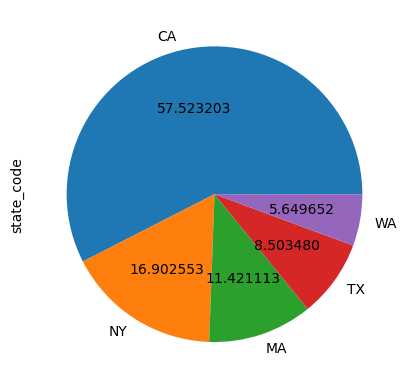

In [ ]:
vc["state_code"].value_counts()[:5].plot(kind="pie",autopct="%2f")

# Seed

<ipython-input-160-a95d512fdc38>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(vc["seed"])


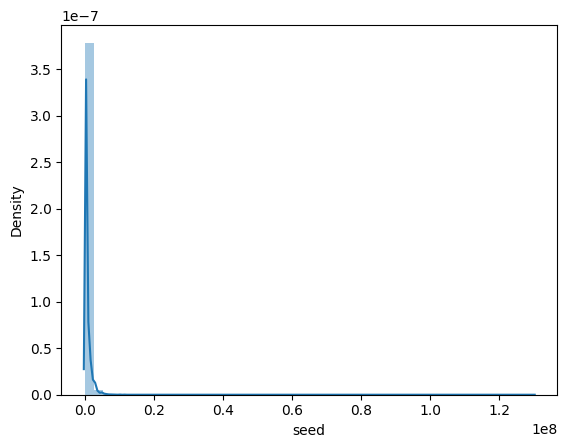

In [ ]:
sns.distplot(vc["seed"])
plt.show()

#Market analysis

In [ ]:
vc.groupby("market").mean().T

market,3D,3D Printing,3D Technology,Accounting,Ad Targeting,Advanced Materials,Adventure Travel,Advertising,Advertising Exchanges,Advertising Networks,...,Wireless,Women,World Domination,Writers,Young Adults,iOS,iPad,iPhone,iPod Touch,mHealth
funding_rounds,1.520000e+00,1.777778e+00,1.750000e+00,2.055556e+00,1.769231e+00,1.0,1.333333,1.892857e+00,3.5,1.00,...,2.302632e+00,1.666667e+00,2.500000e+00,3.0,1.5,1.791667e+00,1.482759e+00,1.536232e+00,1.666667,1.750000
founded_year,2.010714e+03,2.012250e+03,2.011714e+03,2.008000e+03,2.010077e+03,1967.0,2011.833333,2.007781e+03,2009.5,2009.25,...,2.004765e+03,2.008636e+03,2.008500e+03,2013.0,2011.5,2.011196e+03,2.009778e+03,2.009615e+03,2010.000000,2012.428571
seed,5.988315e+05,2.964444e+05,1.295625e+06,2.250834e+05,7.040064e+05,0.0,41666.666667,2.618131e+05,0.0,175000.00,...,5.179605e+04,2.809125e+04,3.051335e+05,345000.0,550000.0,3.767842e+05,2.404709e+05,3.124973e+05,912666.666667,146680.125000
venture,3.288171e+06,2.977778e+06,1.101919e+06,7.850238e+06,5.657842e+06,0.0,119405.333333,9.896282e+06,38568600.0,1875000.00,...,2.030405e+07,6.091667e+06,1.394999e+07,0.0,0.0,4.133056e+06,1.427899e+06,2.530766e+06,533333.333333,12500.000000
equity_crowdfunding,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000,2.047463e+03,0.0,0.00,...,6.578947e+02,0.000000e+00,0.000000e+00,0.0,0.0,2.708333e+04,0.000000e+00,0.000000e+00,0.000000,0.000000
undisclosed,0.000000e+00,0.000000e+00,2.500000e+04,0.000000e+00,0.000000e+00,0.0,0.000000,9.787877e+04,0.0,0.00,...,5.578947e+05,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
convertible_note,0.000000e+00,0.000000e+00,2.562500e+04,1.657006e+05,0.000000e+00,0.0,0.000000,2.234962e+03,0.0,0.00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,2.083333e+04,0.000000e+00,0.000000e+00,0.000000,625.000000
debt_financing,0.000000e+00,0.000000e+00,2.312500e+04,0.000000e+00,2.307692e+05,0.0,0.000000,3.707328e+05,0.0,0.00,...,1.374885e+06,4.166667e+03,4.333333e+05,0.0,0.0,2.760417e+04,1.206897e+04,1.218968e+05,0.000000,0.000000
angel,4.600000e+04,0.000000e+00,6.875000e+04,2.843916e+05,3.558102e+05,0.0,85833.333333,6.352244e+04,141410.0,0.00,...,6.766250e+04,1.666667e+05,1.155750e+05,0.0,0.0,2.104167e+04,9.137931e+04,7.961016e+04,0.000000,412500.000000
grant,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000,7.612613e+02,0.0,0.00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,5.172414e+03,5.072464e+02,0.000000,40493.125000


In [ ]:
len(vc["market"].unique())

754

In [ ]:
vc["market"].value_counts()[:5]

 Software          4620
 Biotechnology     3688
 Mobile            1983
 E-Commerce        1805
 Curated Web       1655
Name: market, dtype: int64

(array([3., 2., 4., 2., 4.]),
 array([ 0.,  2.,  4.,  6.,  8., 10.]),
 <BarContainer object of 5 artists>)

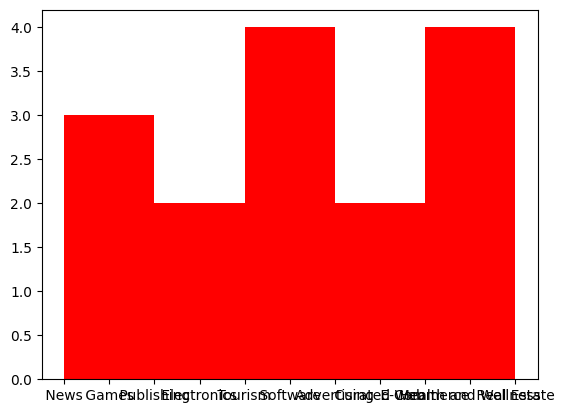

In [ ]:
plt.hist(vc["market"][:15],bins=5,color="red")

#  Status and other feature's relation

<Axes: xlabel='status', ylabel='city'>

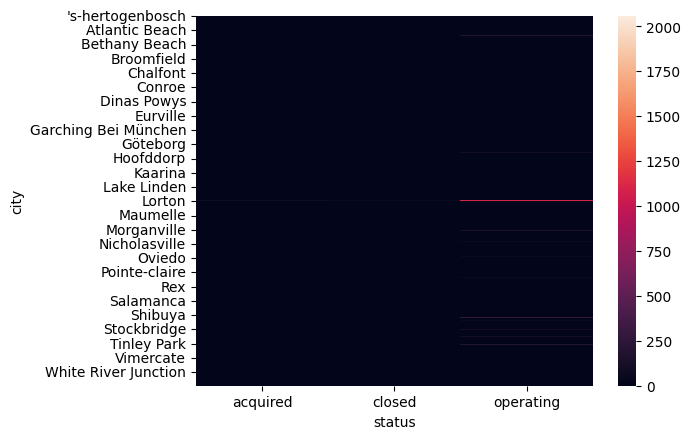

In [ ]:
sns.heatmap(pd.crosstab(vc["city"],vc["status"]))

#Observations-There are companies from 1902 to 2014 in startups.
75% of the start ups companies are very new and were established after 2006, also in upgrade position or still operating

# Category_list Analysis

In [ ]:
vc.groupby("category_list").mean().T

category_list,|3D Printing|,|3D Printing|3D|,|3D Printing|Consumer Electronics|,|3D Printing|Hardware + Software|,|3D Printing|Local|Marketplaces|Collaborative Consumption|,|3D Technology|,|3D Technology|3D Printing|3D|,|3D Technology|3D Printing|Marketplaces|Printing|Design|CAD|Curated Web|,|3D Technology|Entertainment|Game|3D|,|3D Technology|Graphics|,...,|iPod Touch|iPad|iPhone|Android|App Marketing|App Discovery|Mobile|,|iPod Touch|iPad|iPhone|Wireless|Hardware + Software|,|iPod Touch|iPhone|iPad|Entertainment|Peer-to-Peer|Consumer Electronics|Online Shopping|Video Games|Hardware|Marketplaces|Media|Retail|E-Commerce|,|mHealth|,|mHealth|Enterprise Software|,|mHealth|Health Care Information Technology|,|mHealth|Health Care|,|mHealth|Location Based Services|SaaS|Enterprise Software|,|mHealth|Mobile|,|mHealth|Mobile|Health and Wellness|Health Care|
funding_rounds,1.000000,1.0,1.0,3.0,2.0,1.0,1.0,5.0,1.0,1.0,...,2.0,1.0,3.0,1.5,2.0,1.0,2.0,2.0,5.0,1.0
founded_year,2011.666667,NaN,2013.0,2011.0,2013.0,2013.0,2013.0,2013.0,NaN,2011.0,...,2011.0,2005.0,2006.0,2013.5,2010.0,2013.0,2014.0,NaN,2012.0,NaN
seed,10000.000000,0.0,0.0,0.0,0.0,0.0,0.0,2628000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,276672.0,20000.0,200000.0,195383.0,0.0
venture,550000.000000,0.0,0.0,19500000.0,4500000.0,0.0,3350000.0,0.0,0.0,0.0,...,1600000.0,0.0,27000000.0,0.0,115000.0,0.0,0.0,200000.0,100000.0,0.0
equity_crowdfunding,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
undisclosed,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
convertible_note,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5000.0,0.0,0.0,0.0
debt_financing,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,75000.0,0.0,0.0,0.0,0.0,0.0
angel,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,250000.0,500000.0,0.0,1650000.0,0.0,0.0,0.0,0.0,0.0,0.0
grant,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,323945.0,0.0


In [ ]:
vc.category_list

0               |Entertainment|Politics|Social Media|News|
1                                                  |Games|
2                                   |Publishing|Education|
3        |Electronics|Guides|Coffee|Restaurants|Music|i...
4                            |Tourism|Entertainment|Games|
                               ...                        
54289                                                  NaN
54290                                                  NaN
54291                                                  NaN
54292                                                  NaN
54293                                                  NaN
Name: category_list, Length: 54294, dtype: object

In [ ]:
vc["category_list"].value_counts()

|Software|                                                                                     3650
|Biotechnology|                                                                                3597
|E-Commerce|                                                                                   1263
|Mobile|                                                                                       1211
|Curated Web|                                                                                  1120
                                                                                               ... 
|Fashion|Digital Media|Marketplaces|E-Commerce|                                                   1
|Advertising|Web Development|App Marketing|Enterprises|Cloud Computing|Enterprise Software|       1
|Web Design|Software|Web Tools|Web Development|Enterprise Software|                               1
|3D|Web Tools|Entertainment|Curated Web|                                                          1


#
DATA PREPROCESSING OR DATA WRANGLING

#Let's do categorical feature's into categories form

In [ ]:
vc['permalink']=vc['permalink'].astype("category")
vc['permalink']=vc['permalink'].cat.codes

In [ ]:
vc['name']=vc['name'].astype("category")
vc['name']=vc['name'].cat.codes

In [ ]:
vc['homepage_url']=vc['homepage_url'].astype("category")
vc['homepage_url']=vc['homepage_url'].cat.codes

In [ ]:
vc['category_list']=vc['category_list'].astype("category")
vc['category_list']=vc['category_list'].cat.codes

In [ ]:
vc['funding_total_usd']=vc['funding_total_usd'].astype("category")
vc['funding_total_usd']=vc['funding_total_usd'].cat.codes

In [ ]:
vc['country_code']=vc['country_code'].astype("category")
vc['country_code']=vc['country_code'].cat.codes

In [ ]:
vc['state_code']=vc['state_code'].astype("category")
vc['state_code']=vc['state_code'].cat.codes

In [ ]:
vc['region']=vc['region'].astype("category")
vc['region']=vc['region'].cat.codes

In [ ]:
vc['city']=vc['city'].astype("category")
vc['city']=vc['city'].cat.codes

In [ ]:
vc['funding_rounds']=vc['funding_rounds'].astype("category")
vc['funding_rounds']=vc['funding_rounds'].cat.codes

In [ ]:
vc['founded_at']=vc['founded_at'].astype("category")
vc['founded_at']=vc['founded_at'].cat.codes

In [ ]:
vc['founded_month']=vc['founded_month'].astype("category")
vc['founded_month']=vc['founded_month'].cat.codes

In [ ]:
vc['founded_year']=vc['founded_year'].astype("category")
vc['founded_year']=vc['founded_year'].cat.codes

In [ ]:
vc['first_funding_at']=vc['first_funding_at'].astype("category")
vc['first_funding_at']=vc['first_funding_at'].cat.codes

In [ ]:
vc['last_funding_at']=vc['last_funding_at'].astype("category")
vc['last_funding_at']=vc['last_funding_at'].cat.codes

In [ ]:
vc['founded_quarter']=vc['founded_quarter'].astype("category")
vc['founded_quarter']=vc['founded_quarter'].cat.codes

In [ ]:
vc['market']=vc['market'].astype("category")
vc['market']=vc['market'].cat.codes

#Dealing with NAN or Null values

In [ ]:
#Le's see if there are duplicates in data ,we have to drop it.
vc.drop_duplicates(inplace=True)
vc

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,47058,0,43610,5171,465,3978,acquired,110,40,699,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,44587,1,4422,6122,277,9441,operating,110,6,570,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,36158,2,37197,11481,543,9446,operating,35,-1,956,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20284,3,15435,4663,211,3482,operating,38,-1,568,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,34662,4,-1,15218,683,11816,operating,110,53,251,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49434,49434,46502,45116,4894,233,3684,operating,20,-1,89,...,0.0,0.0,1587301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49435,49435,47044,45117,16170,732,14548,operating,44,-1,905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49436,471,47046,16607,6122,277,14402,operating,-1,-1,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49437,48101,47047,44395,4894,233,9087,operating,110,40,699,...,0.0,0.0,16000000.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#In our dataset we replace nan values by 0
vc.fillna((0),inplace=True)
vc

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,47058,0,43610,5171,465,3978,acquired,110,40,699,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,44587,1,4422,6122,277,9441,operating,110,6,570,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,36158,2,37197,11481,543,9446,operating,35,-1,956,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20284,3,15435,4663,211,3482,operating,38,-1,568,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,34662,4,-1,15218,683,11816,operating,110,53,251,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49434,49434,46502,45116,4894,233,3684,operating,20,-1,89,...,0.0,0.0,1587301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49435,49435,47044,45117,16170,732,14548,operating,44,-1,905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49436,471,47046,16607,6122,277,14402,operating,-1,-1,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49437,48101,47047,44395,4894,233,9087,operating,110,40,699,...,0.0,0.0,16000000.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# After NAN removing one rows is till now with NAN , so we fill with 0 it using fillna
vc.fillna((0),axis=0,inplace=True)
vc

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,47058,0,43610,5171,465,3978,acquired,110,40,699,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,44587,1,4422,6122,277,9441,operating,110,6,570,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,36158,2,37197,11481,543,9446,operating,35,-1,956,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20284,3,15435,4663,211,3482,operating,38,-1,568,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,34662,4,-1,15218,683,11816,operating,110,53,251,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49434,49434,46502,45116,4894,233,3684,operating,20,-1,89,...,0.0,0.0,1587301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49435,49435,47044,45117,16170,732,14548,operating,44,-1,905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49436,471,47046,16607,6122,277,14402,operating,-1,-1,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49437,48101,47047,44395,4894,233,9087,operating,110,40,699,...,0.0,0.0,16000000.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#after using 0 on rows while dealing with nan,shape is
vc.shape

(49439, 39)

<Axes: >

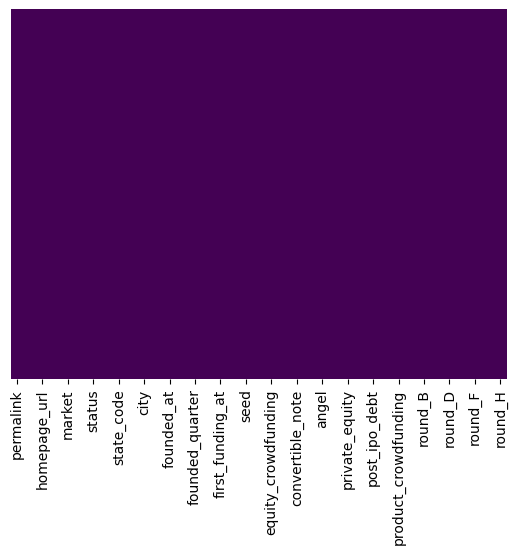

In [ ]:
# Let's see NAN  once again, No NAN  or nulls in  our dataset
sns.heatmap(vc.isnull(),yticklabels=False,cbar=False,cmap="viridis")

#IN our dataset there is no NAN or null values. We have Cleaned_data now.

#Now we can perform our feature engineering =we are using all features without depedent attribute which is status as a input data.Status is as a output variable.

#Target feature

#Lets see our target feature and it's values

In [ ]:
#class distribution
vc["status"].value_counts()

operating    41829
acquired      3692
closed        2603
0             1315
Name: status, dtype: int64

In [ ]:
#Lets check null values of our target variable
vc["status"].isnull().sum()

0

operating    41829
acquired      3692
closed        2603
0             1315
Name: status, dtype: int64


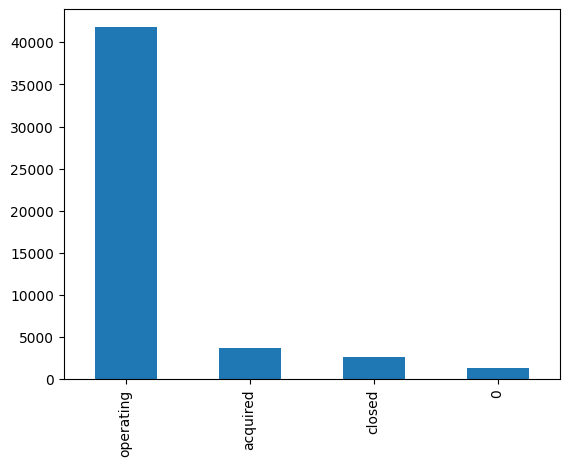

In [ ]:
#"status" Target feature's value_counting
print(vc["status"].value_counts())
vc["status"].value_counts().plot(kind="bar")
plt.show()


### Feature Scaling -standardization the data

#Standardization gives us data values in the format between 0 or 1 as a standard form

In [ ]:
#Mean centering and a process of scaling the factors
#standard deviation by doing Standardization
from sklearn. preprocessing import StandardScaler
Scaler=StandardScaler()
columns_to_scale=['permalink', 'name', 'homepage_url', 'category_list', 'market',
       'funding_total_usd', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at','secondary_market',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
        'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']
vc[columns_to_scale]=Scaler.fit_transform(vc[columns_to_scale])


In [ ]:
#Let's make target in categories form
vc['status']=vc['status'].astype("category")
vc['status']=vc['status'].cat.codes

In [ ]:
vc["status"]=vc["status"].replace({"operating":3,"acquired":1,"closed":2,"zero":0})

#Define X and y

In [ ]:
#X are our indepedent features and y is our target feature.
X=vc.drop(["status"],axis=1)
y=vc["status"]

In [ ]:
X.shape

(49439, 38)

In [ ]:
y.shape

(49439,)

#Train Test Split Ratio is 80:20

In [ ]:
#let it put in train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)


In [ ]:
X_train.shape

(39551, 38)

In [ ]:
X_test.shape

(9888, 38)

In [ ]:
y_test.shape

(9888,)

In [ ]:
y_test.isnull().sum()

0

In [ ]:
y_train.shape

(39551,)

In [ ]:
X_train

,permalink,name,homepage_url,category_list,market,funding_total_usd,country_code,state_code,region,city,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
41431,1.172946,1.032700,-0.601928,0.628075,0.652669,0.967525,0.768448,-0.426843,0.906499,1.021919,...,-0.009951,-0.01652,-0.224866,-0.199779,-0.15079,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238
16109,-0.603000,-0.655513,0.267910,-0.685320,-0.708126,0.740472,0.768448,-0.426843,0.906499,1.021919,...,-0.009951,-0.01652,-0.224866,-0.199779,0.72492,3.083283,-0.063339,-0.027042,-0.01098,-0.005238
40443,1.104346,0.967137,-1.519284,0.274499,0.375309,-1.236301,0.768448,0.160837,1.100985,-0.626154,...,-0.009951,-0.01652,-0.224866,-0.199779,-0.15079,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238
26927,0.154396,0.056134,-1.519284,-1.094890,-1.128499,-0.486266,-1.790023,-0.800822,-1.559934,-1.440719,...,-0.009951,-0.01652,-0.224866,-0.199779,-0.15079,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238
43967,1.349314,1.209243,1.456405,0.927635,-0.976818,-0.387623,0.768448,2.297858,1.024370,-1.289172,...,-0.009951,-0.01652,-0.224866,-0.199779,-0.15079,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.261744,-0.957637,0.062098,-1.398803,-1.388524,0.814998,0.768448,1.389624,0.449752,0.751408,...,-0.009951,-0.01652,-0.224866,0.335513,-0.15079,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238
44732,1.403198,1.255713,1.492737,0.071297,0.457651,1.640210,0.768448,-0.373418,1.428075,1.240904,...,-0.009951,-0.01652,-0.224866,-0.199779,-0.15079,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238
38158,0.945075,0.819234,-1.488010,1.452162,1.428409,-1.106588,0.768448,1.389624,0.502794,0.489989,...,-0.009951,-0.01652,-0.224866,-0.199779,-0.15079,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238
860,-1.672281,-1.653420,-0.383079,1.385483,-0.855473,-1.236301,0.768448,-0.159716,1.266004,-0.876207,...,-0.009951,-0.01652,-0.224866,-0.199779,-0.15079,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238


#For modeling we will use two or three algorithms for prediction according to our data

#This is multiclass classification problem so,we need here multilabelbinazer and One Vs Rest classifier.

#Support Vector Machine Algorithm

In [ ]:
#importing importatnt libraries
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVC
# Instantiate support vector machine.
svc = SVC()
from sklearn.preprocessing import MultiLabelBinarizer

y = [[2, 3, 4], [2], [0, 1, 3], [0, 1, 2, 3, 4], [0, 1, 2]]

MultiLabelBinarizer().fit_transform(y)

array([[0, 0, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [1, 1, 0, 1, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 0, 0]])

In [ ]:
# Fit support vector machine to training data.
svc.fit (X_train,y_train)

SVC()

In [ ]:
svc.score(X_train,y_train)

0.8466789714545776

In [ ]:
svc.score(X_test,y_test)

0.8468851132686084

In [ ]:
# Generate predictions.
y_preds = svc.predict(X_test)

In [ ]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       264
           1       1.00      0.00      0.01       729
           2       0.00      0.00      0.00       523
           3       0.85      1.00      0.92      8372

    accuracy                           0.85      9888
   macro avg       0.46      0.25      0.23      9888
weighted avg       0.79      0.85      0.78      9888



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
## Measure performance based on accuracy.
accuracy_score(y_test,y_preds)

0.8468851132686084

In [ ]:
mean_squared_error(y_test,y_preds)

0.5872775080906149

In [ ]:
r2_score(y_test,y_preds)

-0.15279158017242223

In [ ]:
#See the output inconfusion matrix
cm_v=confusion_matrix(y_test,y_preds)
cm_v

array([[   0,    0,    0,  264],
       [   0,    2,    0,  727],
       [   0,    0,    0,  523],
       [   0,    0,    0, 8372]])

Text(158.22222222222223, 0.5, 'Truth or Actual Values')

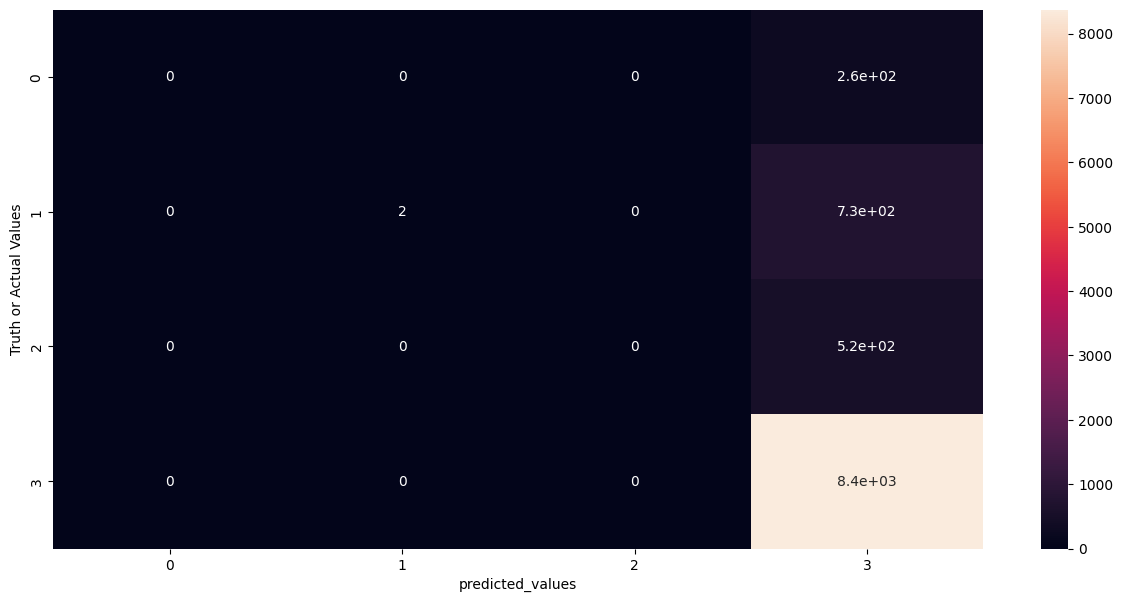

In [ ]:
#Plot the confusion matrix
plt.figure(figsize=(15,7))
sns.heatmap(cm_v,annot=True)
plt.xlabel("predicted_values")
plt.ylabel("Truth or Actual Values")

In [ ]:
print("VotingClassifier confusion matrix")
pd.DataFrame(confusion_matrix(y_test,y_preds))

VotingClassifier confusion matrix


,0,1,2,3
0,0,0,0,264
1,0,2,0,727
2,0,0,0,523
3,0,0,0,8372


#Hyperparameter Tunning for SVM

In [ ]:
# Instantiate SVM.

svc = SVC (

    C = 20,
    kernel = "rbf",
    gamma = "scale"
)

# Fit on training data.

svc.fit(X_train, y_train)

# Evaluate model.

# accuracy_score(y_test, svc.predict(X_test))


SVC(C=20)

In [ ]:
svc.score(X_train,y_train)

0.8595484311395414

In [ ]:
svc.score(X_test,y_test)

0.8457726537216829

In [ ]:
# Generate predictions.
y_predh = svc.predict(X_test)

In [ ]:
accuracy_score(y_test, y_predh)

0.8457726537216829

In [ ]:
print(classification_report(y_test,y_predh))

              precision    recall  f1-score   support

           0       0.27      0.01      0.02       264
           1       0.43      0.07      0.12       729
           2       0.20      0.00      0.00       523
           3       0.85      0.99      0.92      8372

    accuracy                           0.85      9888
   macro avg       0.44      0.27      0.27      9888
weighted avg       0.77      0.85      0.79      9888



#Random forest classifier Algorithm

In [ ]:
#importing importatnt libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import MultiOutputRegressor
# Instantiate randomforest.
model=RandomForestClassifier()
from sklearn.preprocessing import MultiLabelBinarizer

y = [[2, 3, 4], [2], [0, 1, 3], [0, 1, 2, 3, 4], [0, 1, 2]]

MultiLabelBinarizer().fit_transform(y)

array([[0, 0, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [1, 1, 0, 1, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 0, 0]])

In [ ]:
# Fit support vector machine to training data.
model.fit (X_train,y_train)

RandomForestClassifier()

In [ ]:
model.score(X_train,y_train)

0.9999747161892241

In [ ]:
model.score(X_test,y_test)

0.8509304207119741

In [ ]:
# Generate predictions.
y_prediction = model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.75      0.07      0.12       264
           1       0.55      0.12      0.20       729
           2       0.42      0.02      0.03       523
           3       0.86      0.99      0.92      8372

    accuracy                           0.85      9888
   macro avg       0.64      0.30      0.32      9888
weighted avg       0.81      0.85      0.80      9888



In [ ]:
## Measure performance based on accuracy.
accuracy_score(y_test,y_prediction)

0.8509304207119741

In [ ]:
mean_squared_error(y_test,y_prediction)

0.5608818770226537

In [ ]:
r2_score(y_test,y_prediction)

-0.10097849210198961

In [ ]:
y_prediction

array([3, 3, 3, ..., 3, 3, 3], dtype=int8)

In [ ]:
#See the output in confusion matrix
cm_k=confusion_matrix(y_test,y_prediction)
cm_k

array([[  18,    2,    0,  244],
       [   2,   87,    2,  638],
       [   0,   11,    8,  504],
       [   4,   58,    9, 8301]])

Text(158.22222222222223, 0.5, 'Truth or Actual Values')

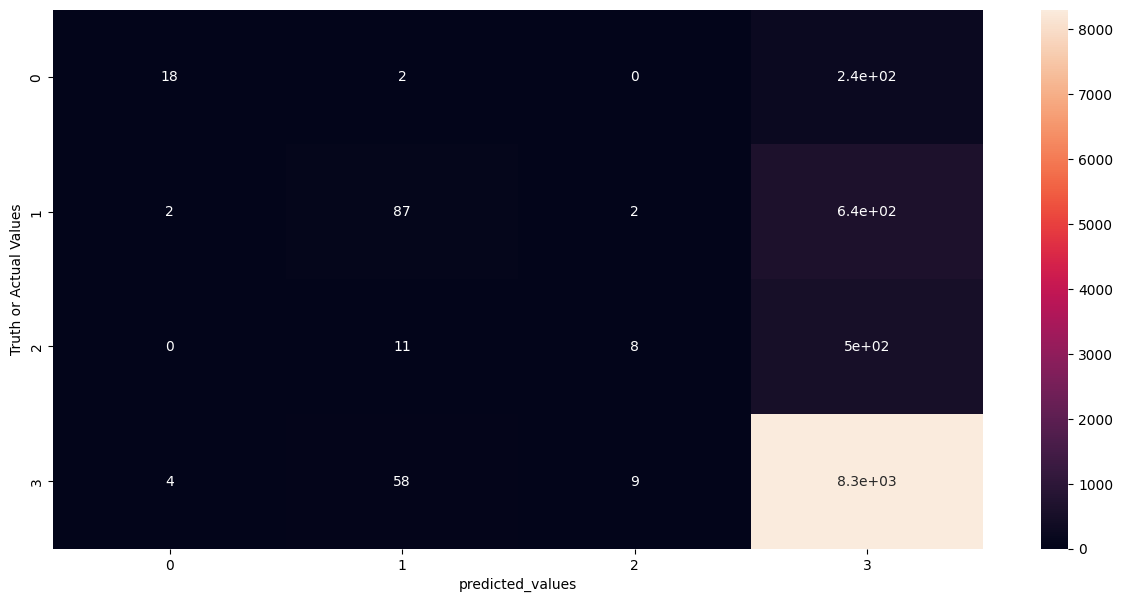

In [ ]:
#Plot the confusion matrix
plt.figure(figsize=(15,7))
sns.heatmap(cm_k,annot=True)
plt.xlabel("predicted_values")
plt.ylabel("Truth or Actual Values")

In [ ]:
print("Random Forest confusion matrix")
pd.DataFrame(confusion_matrix(y_test,y_prediction))

Random Forest confusion matrix


,0,1,2,3
0,18,2,0,244
1,2,87,2,638
2,0,11,8,504
3,4,58,9,8301


#Randomizedsearchcv for randomforest

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 90, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,9]
# Minimum number of samples required to split a node
min_samples_split = [2, 7]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2,3,4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 18, 27, 36, 45, 54, 63, 72, 81, 90], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 9], 'min_samples_split': [2, 7], 'min_samples_leaf': [1, 2, 3, 4], 'bootstrap': [True, False]}


In [ ]:
model = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [ ]:
rf_RandomGrid.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 9],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 7],
                                        'n_estimators': [10, 18, 27, 36, 45, 54,
                                                         63, 72, 81, 90]},
                   verbose=2)

In [ ]:
rf_RandomGrid.best_params_

{'n_estimators': 81,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 9,
 'bootstrap': False}

#Check accuracy

In [ ]:
print (f'Train Accuracy - : {rf_RandomGrid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_RandomGrid.score(X_test,y_test):.3f}')

Train Accuracy - : 0.853
Test Accuracy - : 0.849


#VotingClassifier Algorithm

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

y = [[2, 3, 1], [2], [0, 1, 3], [0, 1, 2, 3], [0, 1, 2]]

MultiLabelBinarizer().fit_transform(y)

array([[0, 1, 1, 1],
       [0, 0, 1, 0],
       [1, 1, 0, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 0]])

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


p = VotingClassifier(
    estimators=[('ada', AdaBoostClassifier()),
                ('rf', RandomForestClassifier()),
                ('gnb', GaussianNB())],
    voting='hard')

In [ ]:
p.fit(X_train,y_train)

VotingClassifier(estimators=[('ada', AdaBoostClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('gnb', GaussianNB())])

In [ ]:
p.score(X_train, y_train)

0.9019240980000506

In [ ]:
p.score(X_test,y_test)

0.8463794498381877

In [ ]:
pred_voting = p.predict(X_test)

In [ ]:
pred_voting

array([3, 3, 3, ..., 3, 3, 3], dtype=int8)

In [ ]:
print(classification_report(y_test,pred_voting))

              precision    recall  f1-score   support

           0       0.20      0.09      0.13       264
           1       0.51      0.15      0.23       729
           2       0.67      0.00      0.01       523
           3       0.86      0.98      0.92      8372

    accuracy                           0.85      9888
   macro avg       0.56      0.31      0.32      9888
weighted avg       0.81      0.85      0.80      9888



In [ ]:
accuracy_score(y_test,pred_voting)

0.8463794498381877

In [ ]:
mean_squared_error(y_test,pred_voting)

0.5949635922330098

In [ ]:
#See the output inconfusion matrix
cm_voting=confusion_matrix(y_test,pred_voting)
cm_voting

array([[  25,    0,    0,  239],
       [  39,  106,    0,  584],
       [  10,   18,    2,  493],
       [  53,   82,    1, 8236]])

Text(158.22222222222223, 0.5, 'Truth or Actual Values')

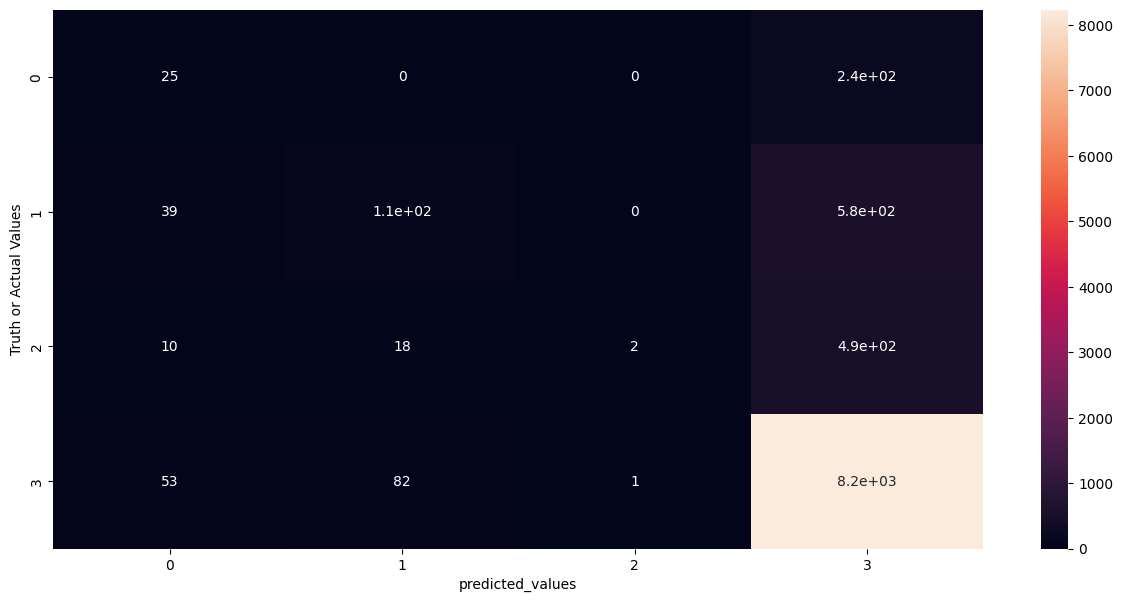

In [ ]:
#Plot the confusion matrix
plt.figure(figsize=(15,7))
sns.heatmap(cm_voting,annot=True)
plt.xlabel("predicted_values")
plt.ylabel("Truth or Actual Values")

In [ ]:
print("VotingClassifier confusion matrix")
pd.DataFrame(confusion_matrix(y_test,pred_voting))

VotingClassifier confusion matrix


,0,1,2,3
0,25,0,0,239
1,39,106,0,584
2,10,18,2,493
3,53,82,1,8236


#cross_validation on votingClassifier

In [ ]:
val_score=cross_val_score(p,X_train,y_train.ravel(),cv=5)

In [ ]:
val_score

array([0.83921122, 0.84766119, 0.84045512, 0.8460177 , 0.84361568])

In [ ]:
val_score.mean()

0.8433921817642258

In [ ]:
val_score.std()

0.0032023254142560477

# Gridsearch cv on VotingClassifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


p = VotingClassifier(
    estimators=[('ada', AdaBoostClassifier()),
                ('rf', RandomForestClassifier()),
                ('gnb', GaussianNB())],
    voting='hard')
# define VotingClassifier parameters to search
params = {'voting':['hard', 'soft'],
          'weights':[(1,1,1), (2,1,1), (1,2,1), (1,1,2)]}

In [ ]:
# find the best set of parameters
grid = GridSearchCV(p, params)
grid.fit(X_train, y_train)
grid.best_params_

{'voting': 'hard', 'weights': (1, 2, 1)}

In [ ]:
# accuracy has improved
grid.best_score_

0.8474628216148649

#Final Score

In [ ]:
# Final score of our all algorithms,Highest one of them
print("Randomforest:",accuracy_score(y_test,y_prediction))
print("voting:",accuracy_score(y_test,pred_voting))
print("svc:",accuracy_score(y_test,y_preds))

Randomforest: 0.8509304207119741
voting: 0.8463794498381877
svc: 0.8468851132686084
